In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q1**

In [57]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv('/content/drive/MyDrive/ml4/data (1).csv')

In [59]:
data.head()

,Unnamed: 0,x,y
0,0,0.874365,5.926937
1,1,-3.185937,2.356974
2,2,-3.472231,3.131644
3,3,0.589067,4.318645
4,4,-2.955939,2.162257


we dont need the unnamed : 0 column  so we just drop it

In [60]:
data.drop(columns = data.columns[0], axis = 1, inplace= True)

In [61]:
data.head()

,x,y
0,0.874365,5.926937
1,-3.185937,2.356974
2,-3.472231,3.131644
3,0.589067,4.318645
4,-2.955939,2.162257


 Visualizing data point

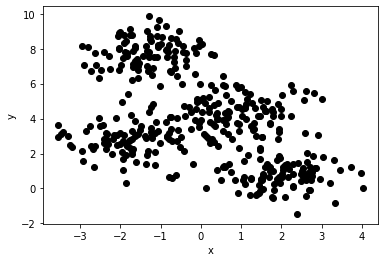

In [62]:
X = data[["x", "y"]]
plt.scatter(X["x"], X["y"], c="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

based on our data i think k=4 is a good number for k

first we need to define a k and find random centroids based on our k

In [63]:
def centroid(X , n):
  Centroids = (X.sample(n))
  plt.scatter(X["x"], X["y"], c="blue")
  plt.scatter(Centroids["x"], Centroids["y"], c="red")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()
  return Centroids

In [64]:
from math import sqrt

now we have to match each point to the nearest centroid and then using the clusters we have , we shoud re-compute the centroids of the clusters

then repeat this untill we obtain optimal clusters , we define a variable diff for calculating the diffrence between the new and the old cluster centrid , when the diff is 0 we can say that our centroids not changing and the algorithm is done

In [65]:
def kmeans(X , Centroids , k) :
  diff = 1
  j=0

  while(diff!=0):
      XD=X
      i=1
      for index1, row_c in Centroids.iterrows():
          ED=[]
          for index2, row_d in XD.iterrows():
              d1 = (row_c["x"]-row_d["x"])**2
              d2 = (row_c["y"]-row_d["y"])**2
              d = sqrt(d1+d2)
              ED.append(d)
          X[i] = ED
          i = i+1
    
      C = []
      for index, row in X.iterrows():
         min_dist=row[1]
         pos=1
         for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
         C.append(pos)
      X["Cluster"]=C
      Centroids_new = X.groupby(["Cluster"]).mean()[["y", "x"]]
      if j == 0:
          diff = 1
          j = j+1
      else:
          diff = (Centroids_new['y'] - Centroids['y']).sum() + (Centroids_new['x'] - Centroids['x']).sum()
          print(diff.sum())
      Centroids = X.groupby(["Cluster"]).mean()[["y","x"]]
  return X ,Centroids

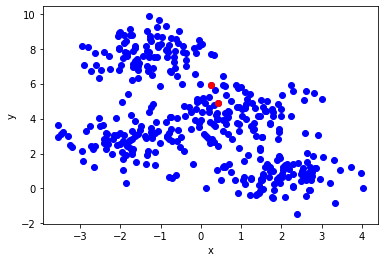

In [66]:
k1 = 2
tempX1 = X
c1 = centroid(tempX1 , k1)

In [67]:
tempX1  , c1 = kmeans(tempX1 ,c1 , k1)

-0.08604616613527916
-0.05101092854222816
-0.01868227718481824
-0.010633515885806855
-0.019031838944671753
0.0


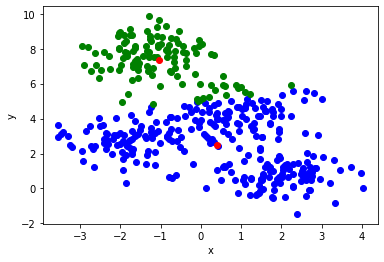

In [68]:
color=['blue','green','cyan' , 'black' , 'yellow']
for k in range(k1):
    data=tempX1[tempX1["Cluster"]==k+1]
    plt.scatter(data["x"],data["y"],c=color[k])
plt.scatter(c1["x"],c1["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

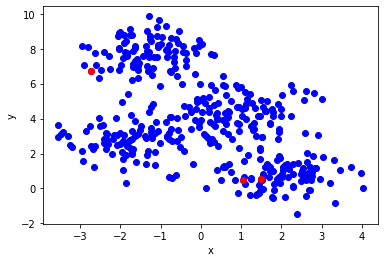

In [69]:
k2 = 3
tempX2 = X
c2 = centroid(tempX2 , k2)

In [70]:
tempX2  , c2 = kmeans(tempX2 ,c2 , k2)

0.7213472416644714
0.34976090457619624
0.28886681198683994
0.17714615559028424
0.08223541057485706
-0.07185201669538677
-0.013255971676667755
-0.009754711256502957
0.022293422526215134
0.01598356471815693
0.016276074748592384
0.0


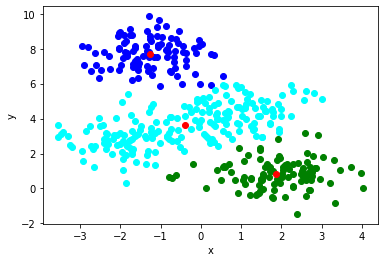

In [71]:
for k in range(k2):
    data=tempX2[tempX2["Cluster"]==k+1]
    plt.scatter(data["x"],data["y"],c=color[k])
plt.scatter(c2["x"],c2["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

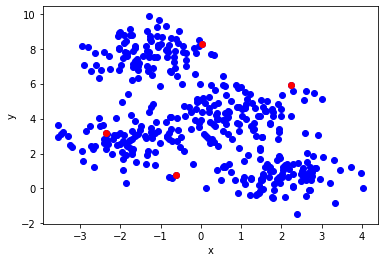

In [72]:
k3 = 4
tempX3 = X
c3 = centroid(tempX3 , k3)

In [73]:
tempX3  , c3 = kmeans(tempX3 ,c3 , k3)

-0.5395555822891703
-0.296766144623575
-0.1650869905430894
-0.04192846435946063
-0.042651384644111445
-0.04235563867579517
0.0


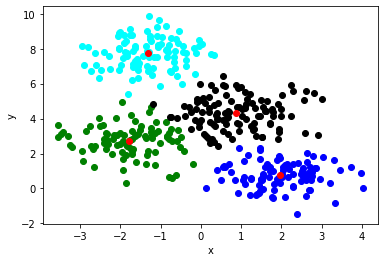

In [74]:
for k in range(k3):
    data=tempX3[tempX3["Cluster"]==k+1]
    plt.scatter(data["x"],data["y"],c=color[k])
plt.scatter(c3["x"],c3["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

i think k = 4 is the best k we can choose , we can stop here =)

**Q2**

In [75]:
img = plt.imread("/content/drive/MyDrive/ml4/pirooz.jpg")
img.shape

(128, 128, 3)

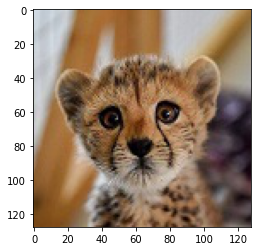

In [76]:
plt.imshow(img)

In [77]:
palete = img.reshape(-1 , 3)
p = pd.DataFrame(palete , columns = ['r','g','b'])

In [78]:
p

,r,g,b
0,214,223,232
1,213,222,231
2,212,221,230
3,212,221,230
4,200,210,219
...,...,...,...
16379,112,103,98
16380,107,98,93
16381,103,92,90
16382,100,88,88


we use the same functions as before but change few details since our data is diffrent

here we removed the scatter part from earlier function , other parts are unchanged

In [79]:
def centroid_img(X , n):
  Centroids = (X.sample(n))
  return Centroids

In [80]:
p = p[['r', 'g','b']]
c5 = centroid_img(p , 5)

In [81]:
c5

,r,g,b
7763,32,27,34
12083,154,137,119
16238,97,70,51
11566,24,14,4
2186,207,216,223


in this function , we added another d (d3) since we are working with RGB and have 3 columns of data , and also in the diff variable i added 1 more diffrence measurment 

In [82]:
def kmeans_img(X , Centroids , k) :
  diff = 1
  j=0

  while(diff!=0):
      XD=X
      i=1
      for index1, row_c in Centroids.iterrows():
          ED=[]
          for index2, row_d in XD.iterrows():
              d1 = (row_c.iloc[0]-row_d.iloc[0])**2
              d2 = (row_c.iloc[1]-row_d.iloc[1])**2
              d3 = (row_c.iloc[2]-row_d.iloc[2])**2
              d = sqrt(d1+d2+d3)
              ED.append(d)
          X[i] = ED
          i = i+1
    
      C = []
      for index, row in X.iterrows():
         min_dist=row[1]
         pos=1
         for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
         C.append(pos)
      X["Cluster"]=C
      Centroids_new = X.groupby(["Cluster"]).mean()[["r", "g" , "b"]]
      if j == 0:
          diff = 1
          j = j+1
      else:
          diff = (Centroids_new['b'] - Centroids['b']).sum()+(Centroids_new['g'] - Centroids['g']).sum() + (Centroids_new['r'] - Centroids['r']).sum()
          print(diff.sum())
      Centroids = X.groupby(["Cluster"]).mean()[["r","g" , "b"]]
  return X ,Centroids

In [83]:
p5 , c5 = kmeans_img(p , c5 , 5)

<ipython-input-82-2e12d07eded2>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  d1 = (row_c.iloc[0]-row_d.iloc[0])**2
<ipython-input-82-2e12d07eded2>:12: RuntimeWarning: overflow encountered in ubyte_scalars
  d2 = (row_c.iloc[1]-row_d.iloc[1])**2
<ipython-input-82-2e12d07eded2>:13: RuntimeWarning: overflow encountered in ubyte_scalars
  d3 = (row_c.iloc[2]-row_d.iloc[2])**2


26.197987852597475
10.063619957928571
26.828934541732618
34.86819222201121
37.6784954280825
34.176802383165
25.776953773565783
21.59274891179769
16.590055425846135
12.783590278616998
8.816923519239829
4.952882870391662
4.684638475038078
3.7164305605910357
2.455288877718111
1.5815320180134798
1.3567483143459356
0.9054314004625574
0.9178539432938919
0.6166495388933058
0.6207175211834439
0.23389007694139607
0.17260762268328023
0.19133419031545884
0.22550686081936533
0.09974485316735127
0.14149546597579743
0.12555030738431583
0.04795811512922654
0.024953962875315483
0.0


In [84]:
p5

,r,g,b,1,2,3,4,5,Cluster
0,214,223,232,331.163807,143.333016,212.582631,258.108320,53.157182,5
1,213,222,231,329.437089,141.710202,210.959464,256.399864,51.504525,5
2,212,221,230,327.710427,140.090004,209.338043,254.691726,49.857259,5
3,212,221,230,327.710427,140.090004,209.338043,254.691726,49.857259,5
4,200,210,219,308.212039,122.234118,191.373363,235.491900,32.181493,5
...,...,...,...,...,...,...,...,...,...
16379,112,103,98,124.694886,76.172080,51.663362,52.862607,154.902955,3
16380,107,98,93,116.040760,84.316813,53.401369,44.937536,163.554505,4
16381,103,92,90,108.512896,91.723721,56.690241,38.630235,171.056364,4
16382,100,88,88,103.334811,96.942972,59.640940,34.748772,176.253432,4


our final centroids

In [85]:
c5

,r,g,b
Cluster,,,
1,43.460997,28.113811,25.589514
2,171.631983,145.394758,119.187186
3,151.310390,107.649067,64.800867
4,98.360231,72.872716,56.759744
5,195.785423,193.590391,191.639251


In [86]:
c5 = c5.astype(int)

In [87]:
c5

,r,g,b
Cluster,,,
1,43,28,25
2,171,145,119
3,151,107,64
4,98,72,56
5,195,193,191


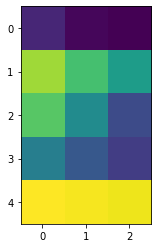

In [88]:
plt.imshow(c5)

In [89]:
lables5 = p5.loc[: ,["Cluster"]]

In [90]:
lables5

,Cluster
0,5
1,5
2,5
3,5
4,5
...,...
16379,3
16380,4
16381,4
16382,4


In [91]:
centroids = c5.to_numpy()

In [92]:
lbls5 = lables5.to_numpy()

In [93]:
lbls5

array([[5],
       [5],
       [5],
       ...,
       [4],
       [4],
       [4]])

In [94]:
colors5 = centroids.astype(int)[lbls5-1].reshape(img.shape)

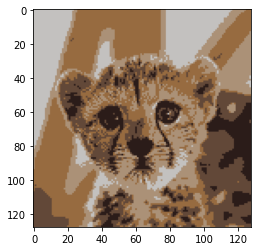

In [95]:
plt.imshow(colors5)

lets try with more colors

In [96]:
c10 = centroid_img(p , 10)

In [97]:
p10 , c10 = kmeans_img(p , c10 , 10)

-0.5880337711612391
0.07790692657149911
0.6079000667891101
0.08823449766887137
-0.12756860026509287
1.052062993293955
1.9350875294411942
0.32118638912534436
1.7261346769410117
2.3734947407043947
3.659125750065776
4.251100092153507
4.3358378840382485
4.032169668495296
4.75193332068884
5.019862272700504
6.240367197313114
5.637666080964092
6.7383171005387865
5.7671093296864555
5.3556113456434105
5.104189990601046
5.067774149066697
4.3354749418556935
3.639387601233235
1.8191499036069914
1.4759813217268842
1.2917278823817036
1.274474104598582
0.9960370150777678
1.041941800530978
0.5722687287554038
0.5274569501563491
0.47819695970849807
0.2778448966446021
0.1039656058330678
0.14717748148737542
0.10748119875137263
0.05058818802982046
0.0


In [98]:
c10 = c10.astype(int)

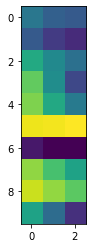

In [99]:
plt.imshow(c10)

In [100]:
lables10 = p10.loc[: ,["Cluster"]]

In [101]:
centroids = c10.to_numpy()

In [102]:
lbls10 = lables10.to_numpy()

In [103]:
lbls10

array([[6],
       [6],
       [6],
       ...,
       [3],
       [1],
       [1]])

In [104]:
colors10 = centroids.astype(int)[lbls10-1].reshape(img.shape)

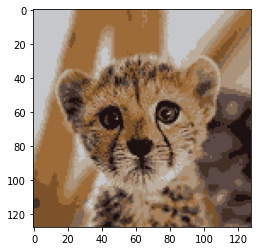

In [105]:
plt.imshow(colors10)

comparing the org img with color5 and color 10

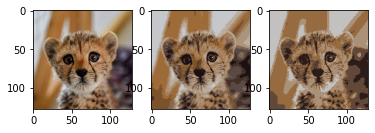

In [108]:
plt.subplot(1 ,3 ,1 )
plt.imshow(img) #org
plt.subplot(1 ,3 ,2 )
plt.imshow(colors10) #using 10 colors
plt.subplot(1 ,3 ,3 )
plt.imshow(colors5) #using 5 colors